# Advanced Analytics of Finance
# Assignment 3
# Elina Harutyunyan

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statistics as stat
from scipy import stats
import seaborn as sns
import math as math

In [2]:
pm = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/Assignment 3/PM.csv")
mktrf = pd.read_csv("/Users/elinaharutyunyan/Desktop/MFin Spring 2020/Advanced Analytics of Finance/mkt_rf.csv")
pm.Date = pd.to_datetime(pm.Date,format = '%Y%m',errors = 'ignore')
mktrf.Date = pd.to_datetime(mktrf.Date, format = '%Y%m',errors = 'ignore')
mktrf.set_index('Date',inplace = True)
pm.set_index('Date',inplace = True)
mktrf = mktrf/100
pm = pm/100

In [3]:
pm.head()

,PM1,PM2
Date,,
2005-01-01,-0.0632,0.0060
2005-02-01,0.0058,0.0232
2005-03-01,-0.0404,-0.0112
2005-04-01,-0.0627,-0.0192
2005-05-01,0.0779,0.0374


In [4]:
mktrf.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0296,-0.0230,-0.0287,0.0022
1926-08-01,0.0264,-0.0140,0.0419,0.0025
1926-09-01,0.0036,-0.0132,0.0001,0.0023
1926-10-01,-0.0324,0.0004,0.0051,0.0032
1926-11-01,0.0253,-0.0020,-0.0035,0.0031


In [5]:
mktrf = mktrf['2005-01-01':'2019-12-01']

In [6]:
pm.tail()

,PM1,PM2
Date,,
2019-08-01,-0.0131,-0.0468
2019-09-01,-0.0289,0.0512
2019-10-01,0.0388,0.0094
2019-11-01,0.0834,0.0351
2019-12-01,0.0233,0.0442


In [7]:
RF = mktrf.RF['2005-01-01':'2019-12-01']

In [8]:
RF

Date
2005-01-01    0.0016
2005-02-01    0.0016
2005-03-01    0.0021
2005-04-01    0.0021
2005-05-01    0.0024
               ...  
2019-08-01    0.0016
2019-09-01    0.0018
2019-10-01    0.0015
2019-11-01    0.0012
2019-12-01    0.0014
Name: RF, Length: 180, dtype: float64

In [9]:
pm['PM1_ex'] = pm.PM1 - RF
pm['PM2_ex'] = pm.PM2 - RF

In [10]:
pm

,PM1,PM2,PM1_ex,PM2_ex
Date,,,,
2005-01-01,-0.0632,0.0060,-0.0648,0.0044
2005-02-01,0.0058,0.0232,0.0042,0.0216
2005-03-01,-0.0404,-0.0112,-0.0425,-0.0133
2005-04-01,-0.0627,-0.0192,-0.0648,-0.0213
2005-05-01,0.0779,0.0374,0.0755,0.0350
...,...,...,...,...
2019-08-01,-0.0131,-0.0468,-0.0147,-0.0484
2019-09-01,-0.0289,0.0512,-0.0307,0.0494
2019-10-01,0.0388,0.0094,0.0373,0.0079


## Part A

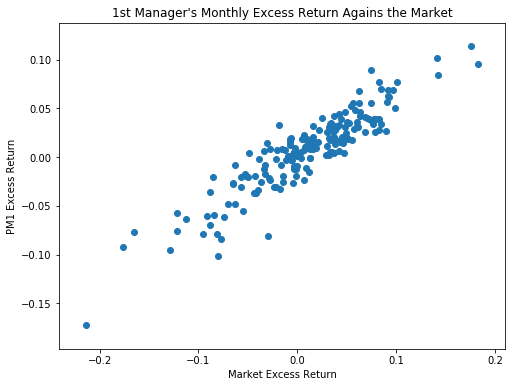

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x = pm['PM1_ex'], y = mktrf['Mkt-RF'])
plt.xlabel("Market Excess Return")
plt.ylabel("PM1 Excess Return")
plt.title("1st Manager's Monthly Excess Return Agains the Market")
plt.show()

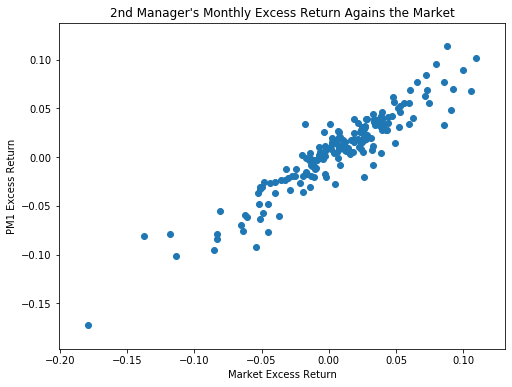

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x = pm['PM2_ex'], y = mktrf['Mkt-RF'])
plt.xlabel("Market Excess Return")
plt.ylabel("PM1 Excess Return")
plt.title("2nd Manager's Monthly Excess Return Agains the Market")
plt.show()

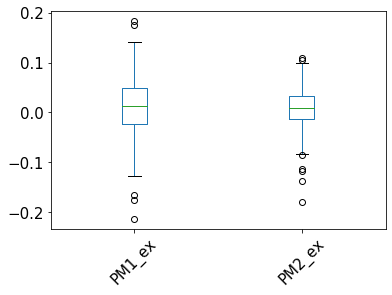

In [13]:
pm.boxplot(column=['PM1_ex','PM2_ex'],grid=False, rot=45, fontsize=15)

In [32]:
#mean
print("PM1 Annualized Mean Return: ",round(pm.PM1_ex.mean()*1200,3))
print("PM2 Annualized Mean Return: ",round(pm.PM2_ex.mean()*1200,3))

#standard deviation
print("PM1 Annualized Standard Deviation of Excess Returns: ",round(pm.PM1_ex.std()*math.sqrt(12)*100,3))
print("PM2 Annualized Standard Deviation of Excess Returns: ",round(pm.PM2_ex.std()*math.sqrt(12)*100,3))

#Sharpe Ratio
print("PM1 Sharpe Ratio: ",round(pm.PM1_ex.mean()/pm.PM1_ex.std()*math.sqrt(12),3))
print("PM2 Sharpe Ratio: ",round(pm.PM2_ex.mean()/pm.PM2_ex.std()*math.sqrt(12),3))

PM1 Annualized Mean Return:  12.309
PM2 Annualized Mean Return:  8.553
PM1 Annualized Standard Deviation of Excess Returns:  21.088
PM2 Annualized Standard Deviation of Excess Returns:  15.398
PM1 Sharpe Ratio:  0.584
PM2 Sharpe Ratio:  0.555


In [15]:
mkt_exret = mktrf["Mkt-RF"]

In [33]:
#Information ratio
IR_PM1 = (pm.PM1_ex.mean()-mkt_exret.mean())/((pm.PM1_ex-mkt_exret).std())
IR_PM2 = (pm.PM2_ex.mean()-mkt_exret.mean())/((pm.PM2_ex-mkt_exret).std())
print("PM1 Information Ratio: ",round(IR_PM1*math.sqrt(12),3))
print("PM2 Information Ratio: ",round(IR_PM2*math.sqrt(12),3))

PM1 Information Ratio:  0.377
PM2 Information Ratio:  -0.006


In [17]:
#calculating cumulative returns for both indexes
cumrets_pm1 = np.cumprod(pm.PM1_ex+1)
cumrets_pm2 = np.cumprod(pm.PM2_ex+1)

In [18]:
#maximum drawdown
#PM1
max_val = 0
drawdown_pm1 = []
for i in range(0,cumrets_pm1.shape[0]):
    if cumrets_pm1[i] > max_val:
        max_val = cumrets_pm1[i]
    drawdown_pm1.append((max_val - cumrets_pm1[i])/max_val)

In [19]:
drawdown_pm1 = pd.DataFrame(drawdown_pm1).set_index(cumrets_pm1.index)

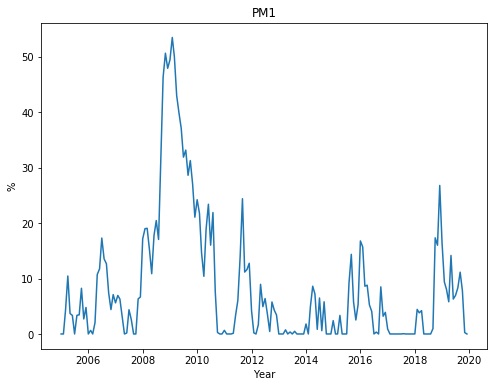

Max Drawdown of PM1 is:  53.489


In [34]:
plt.figure(figsize=(8,6))
plt.plot(drawdown_pm1*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("PM1")
plt.show()

print("Max Drawdown of PM1 is: ",round(drawdown_pm1[0].max()*100,3))

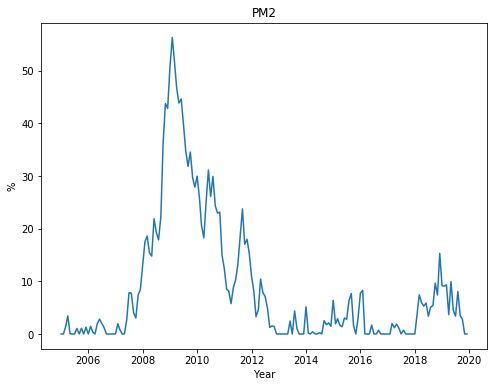

Max Drawdown of PM2 is:  56.322


In [35]:
#max drawdown PM2
max_val = 0
drawdown_pm2 = []
for i in range(0,cumrets_pm2.shape[0]):
    if cumrets_pm2[i] > max_val:
        max_val = cumrets_pm2[i]
    drawdown_pm2.append((max_val - cumrets_pm2[i])/max_val)
drawdown_pm2 = pd.DataFrame(drawdown_pm2).set_index(cumrets_pm2.index)
plt.figure(figsize=(8,6))
plt.plot(drawdown_pm2*100)
plt.xlabel("Year")
plt.ylabel("%")
plt.title("PM2")
plt.show()

print("Max Drawdown of PM2 is: ",round(drawdown_pm2[0].max()*100,3))

In [22]:
mktrf

,Mkt-RF,SMB,HML,RF
Date,,,,
2005-01-01,-0.0276,-0.0151,0.0196,0.0016
2005-02-01,0.0189,-0.0051,0.0164,0.0016
2005-03-01,-0.0197,-0.0138,0.0159,0.0021
2005-04-01,-0.0261,-0.0398,-0.0035,0.0021
2005-05-01,0.0365,0.0288,-0.0081,0.0024
...,...,...,...,...
2019-08-01,-0.0258,-0.0241,-0.0499,0.0016
2019-09-01,0.0144,-0.0090,0.0671,0.0018
2019-10-01,0.0206,0.0025,-0.0207,0.0015


In [23]:
pm.PM1_ex

Date
2005-01-01   -0.0648
2005-02-01    0.0042
2005-03-01   -0.0425
2005-04-01   -0.0648
2005-05-01    0.0755
               ...  
2019-08-01   -0.0147
2019-09-01   -0.0307
2019-10-01    0.0373
2019-11-01    0.0822
2019-12-01    0.0219
Name: PM1_ex, Length: 180, dtype: float64

## Part B

In [110]:
x_vals = mktrf[['Mkt-RF','SMB','HML']]
x_vals = sm.add_constant(x_vals)
pm1_ols = sm.OLS(pm.PM1_ex,x_vals).fit()
print(pm1_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM1_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6983.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):          1.11e-182
Time:                        18:13:24   Log-Likelihood:                 679.79
No. Observations:                 180   AIC:                            -1352.
Df Residuals:                     176   BIC:                            -1339.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.841e-06      0.000     -0.018      0.9

/Users/elinaharutyunyan/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
x_vals = mktrf[['Mkt-RF','SMB','HML']]
pm2_ols = sm.OLS(pm.PM2_ex,sm.add_constant(x_vals)).fit()
print(pm2_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 PM2_ex   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1511.
Date:                Sun, 15 Mar 2020   Prob (F-statistic):          2.59e-125
Time:                        18:13:42   Log-Likelihood:                 601.29
No. Observations:                 180   AIC:                            -1195.
Df Residuals:                     176   BIC:                            -1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.468      0.1

In [39]:
pm

,PM1,PM2,PM1_ex,PM2_ex
Date,,,,
2005-01-01,-0.0632,0.0060,-0.0648,0.0044
2005-02-01,0.0058,0.0232,0.0042,0.0216
2005-03-01,-0.0404,-0.0112,-0.0425,-0.0133
2005-04-01,-0.0627,-0.0192,-0.0648,-0.0213
2005-05-01,0.0779,0.0374,0.0755,0.0350
...,...,...,...,...
2019-08-01,-0.0131,-0.0468,-0.0147,-0.0484
2019-09-01,-0.0289,0.0512,-0.0307,0.0494
2019-10-01,0.0388,0.0094,0.0373,0.0079


## Part C

In [113]:
#Differences in means
T = pm.shape[0]
mu_hat1 = np.mean(pm["PM1_ex"])
mu_hat2 = np.mean(pm["PM2_ex"])

var1 = np.var(pm["PM1_ex"])*(T/(T-1))
var2 = np.var(pm["PM2_ex"])*(T/(T-1))
denominator = ((var1/T) + (var2/T))**0.5

t = (mu_hat1-mu_hat2)/denominator
print(t)
#Do Not Reject Null Hypothesis"

0.5572065615951458


In [98]:
#Differences in Sharpe Ratios
sigma_hat1 = np.std(pm["PM1_ex"])
sigma_hat2 = np.std(pm["PM2_ex"])

A_hat = np.array([1/sigma_hat1, -mu_hat1/(sigma_hat1)**2, -1/sigma_hat2, mu_hat2/(sigma_hat2)**2]).reshape(1,4)

In [99]:
print(sigma_hat1)
print(sigma_hat2)
print(A_hat)

0.06070762166643544
0.044325832486455156
[[ 16.47239626  -2.78334377 -22.56020798   3.62749229]]


In [100]:
#f <- rbind(x-mu_hat, (x-mu_hat)^2-sigma_hat^2)
f1 = pd.DataFrame(pm["PM1_ex"] - mu_hat1).T
f2 = pd.DataFrame((pm["PM1_ex"] - mu_hat1)**2 - (sigma_hat1)**2).T
f3 = pd.DataFrame(pm["PM2_ex"] - mu_hat2).T
f4 = pd.DataFrame((pm["PM2_ex"] - mu_hat2)**2 - (sigma_hat2)**2).T
f = pd.concat([f1,f2,f3,f4])

In [103]:
S = f@f.T
S_hat = np.array([S.values]).reshape(4,4)
d_hat = np.array([[-1,0,0,0],[0,-2*sigma_hat1,0,0],[0,0,-1,0],[0,0,0,-2*sigma_hat2]]).reshape(4,4)
omega_hat = (1/T)*np.linalg.inv((d_hat).T@np.linalg.inv(S_hat)@d_hat)

var_hat = A_hat@omega_hat@A_hat.T

In [114]:
d_hat

array([[-1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.12141524,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.08865166]])

In [104]:
var_hat

array([[0.55105711]])

In [109]:
# Hypothesis Test
sharpe1 = np.mean(pm["PM1_ex"])/np.std(pm["PM1_ex"])
sharpe2 = np.mean(pm["PM2_ex"])/np.std(pm["PM2_ex"])

tstat = (sharpe1-sharpe2)/(var_hat)**0.5
print(tstat)
#Do Not Reject Null Hypothesis

Test Statistic =  [[0.01101739]]
Do Not Reject Null Hypothesis


In [112]:
#Differences in Informaiton Ratio
IR1 = pm1_ols.params[0] / (np.var(pm1_ols.resid))**0.5
IR2 = pm2_ols.params[0] / (np.var(pm2_ols.resid))**0.5
var_IR1 = (pm1_ols.bse[0]**2)*1/(np.var(pm1_ols.resid))
var_IR2 = (pm2_ols.bse[0]**2)*1/(np.var(pm2_ols.resid))

print((IR1 - IR2)/(((var_IR1)/T + (var_IR2)/T)**0.5))
#Reject Null Hypothesis

Test Statistic =  -14.100277659205327
Reject Null Hypothesis
